In [11]:
# Load packages necessary for the computations below
from numpy import ones_like, exp, sqrt, array
from numpy.random import uniform, gamma
import matplotlib
import matplotlib.pyplot as plt
import scipy.special as sps
from helper_ex1 import visualize
font = {'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

----
## 1) Uniformly distributed random variables
Create some samples from a uniform distribution and compare 
with statistical quantities.



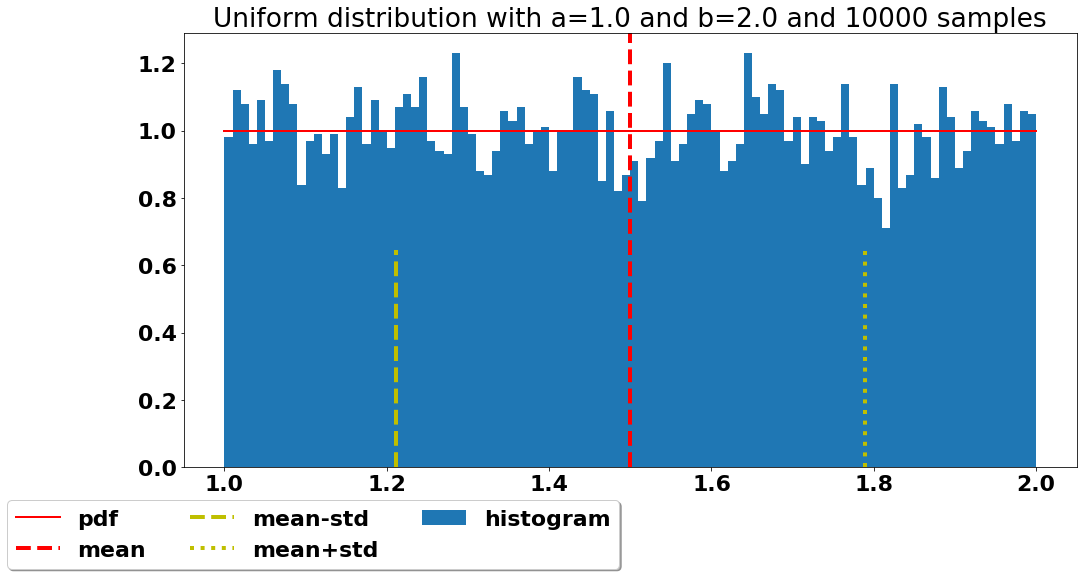

In [12]:
nsamples = 10000
nbins = 100
a, b = 1.0, 2.0
s = uniform(a,b,nsamples)
fig, ax = plt.subplots(figsize=(16,8))
count, bins, ignored = ax.hist(s, nbins, density=True)
ax.plot(bins, ones_like(bins)/(b-a), linewidth=2, color='r')
mean = (b+a)/2
var = (b-a)**2/12
ax.axvline(mean, linewidth=4, color='r', linestyle="--")
ax.axvline(mean-sqrt(var),0,0.5,linewidth=4, color='y', linestyle="--")
ax.axvline(mean+sqrt(var),0,0.5,linewidth=4, color='y', linestyle=":")
ax.legend(["pdf","mean","mean-std","mean+std","histogram"],bbox_to_anchor=(0.5, -0.05),shadow=True, ncol=3);
ax.set_title("Uniform distribution with a={} and b={} and {} samples".format(a,b,nsamples));

-----
## 2) Gamma distributed random variables
Create some samples from a Gamma distribution and compare 
with statistical quantities.


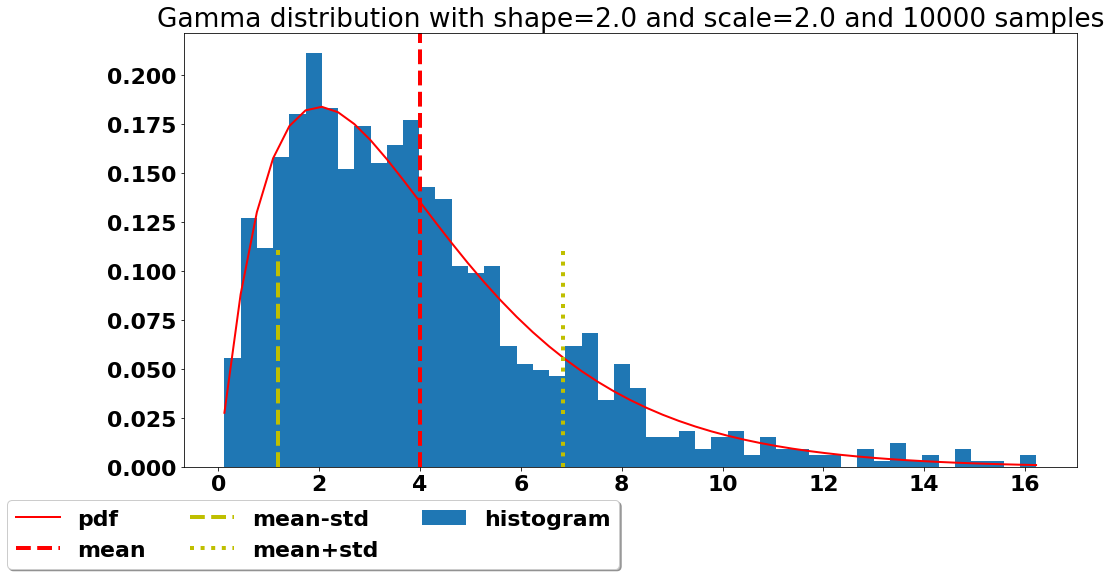

In [13]:
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = gamma(shape, scale, 1000)
fig, ax = plt.subplots(figsize=(16,8))
count, bins, ignored = ax.hist(s, 50, density=True)
y = bins**(shape-1)*(exp(-bins/scale) /
        (sps.gamma(shape)*scale**shape))
ax.plot(bins, y, linewidth=2, color='r');
mean = shape*scale
var = shape*scale**2
ax.axvline(mean, linewidth=4, color='r', linestyle="--")
ax.axvline(mean-sqrt(var),0,0.5,linewidth=4, color='y', linestyle="--")
ax.axvline(mean+sqrt(var),0,0.5,linewidth=4, color='y', linestyle=":")
ax.legend(["pdf","mean","mean-std","mean+std","histogram"],bbox_to_anchor=(0.5, -0.05),shadow=True, ncol=3);
ax.set_title("Gamma distribution with shape={} and scale={} and {} samples".format(shape,scale, nsamples));

----
## 3) Approximating $\pi$ with Monte Carlo


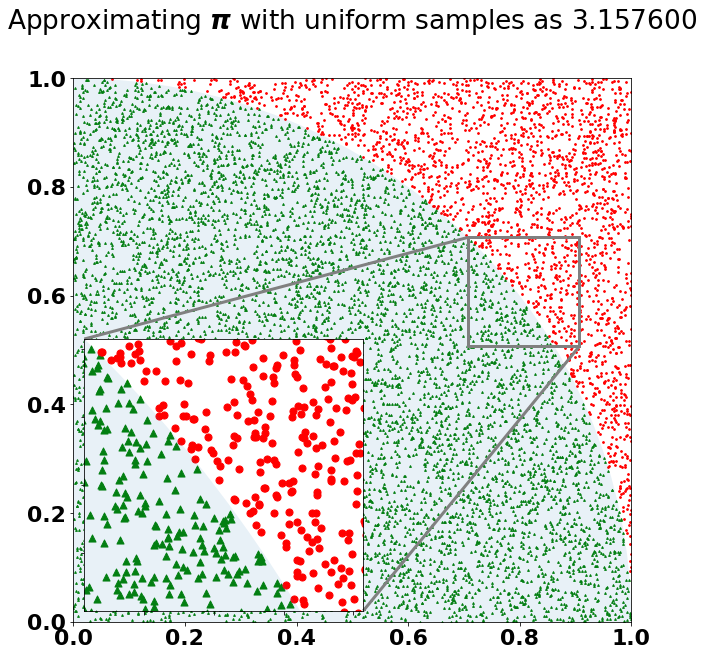

In [14]:
# With uniform samples
x = uniform(0,1,10000)
y = uniform(0,1,10000)
visualize(x,y,'uniform')

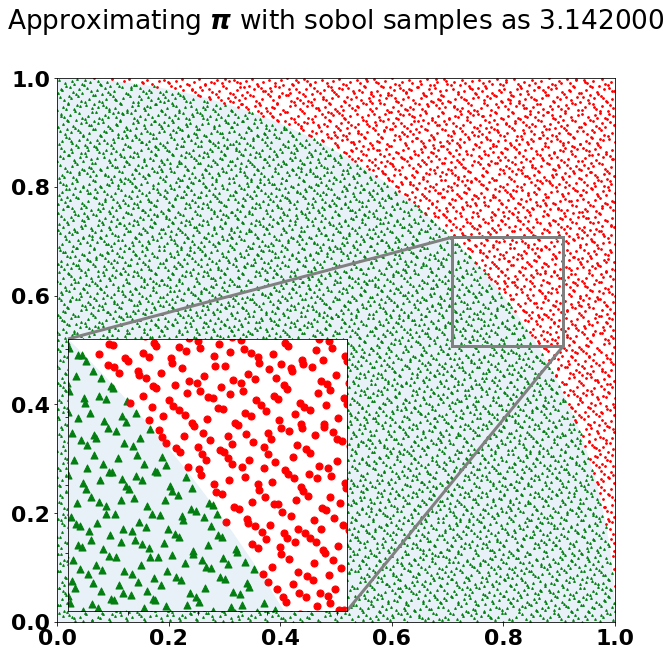

In [26]:
!pip install sobol_seq
import sobol_seq
vec, seed = sobol_seq.i4_sobol(4, 1)
samples = sobol_seq.i4_sobol_generate(2, 10000)
x = samples[:,0]
y = samples[:,1]
visualize(x,y,'sobol')


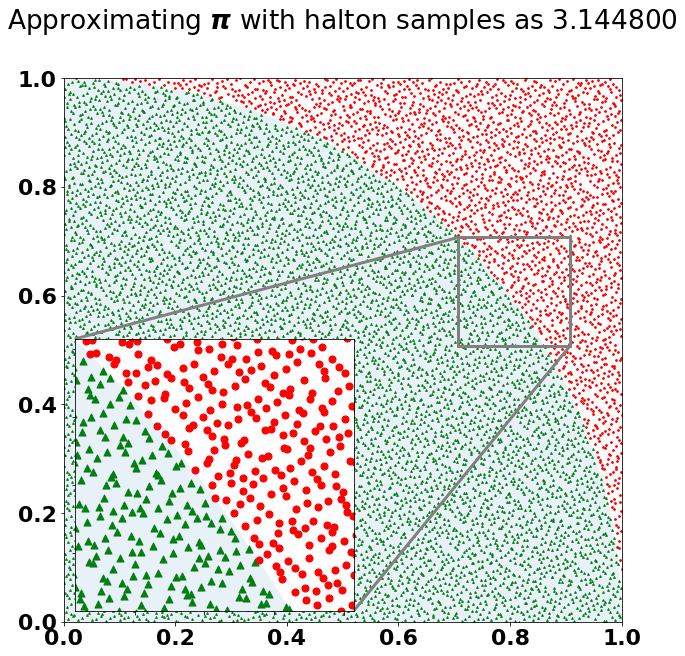

In [27]:
!pip install ghalton
import ghalton
sequencer = ghalton.Halton(2) # two dimensions
samples = array(sequencer.get(10000))
x = samples[:,0]
y = samples[:,1]
visualize(x,y,'halton')